# Mall customers segmentation using K-Means Cluster

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from IPython.display import Image
from sklearn.metrics import silhouette_score

In [48]:
data = pd.read_csv('Mall_Customers[1].csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [49]:
data.shape

(200, 5)

# Explore

In [50]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [52]:
mask = data['Spending Score (1-100)'] >50
data_score = data[mask]
data_score.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72


In [53]:
data_score.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,97.000000,97.000000,97.000000,97.000000
mean,100.298969,34.597938,60.412371,71.670103
std,59.122783,13.024544,26.756133,14.710910
min,2.000000,18.000000,15.000000,51.000000
25%,51.000000,26.000000,42.000000,57.000000
50%,96.000000,31.000000,60.000000,73.000000
75%,152.000000,38.000000,78.000000,85.000000
max,200.000000,70.000000,137.000000,99.000000


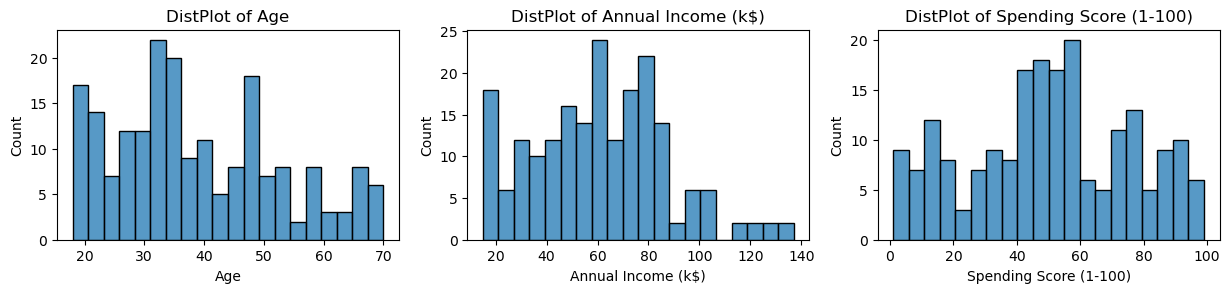

In [56]:
plt.figure(figsize = (15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(2,3,n)
    plt.subplots_adjust(hspace=0.2,wspace = 0.2)
    sns.histplot(data[x],bins = 20)
    plt.title('DistPlot of {}'.format(x))
plt.show();

In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

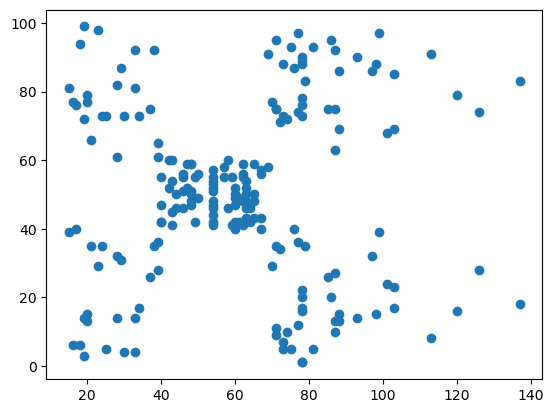

In [18]:
data["x1"] = data["Annual Income (k$)"]
data["x2"] = data["Spending Score (1-100)"]

plt.scatter(x1,x2)

In [19]:
X = data[["x1","x2"]]
X.head()

,x1,x2
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [29]:
from sklearn.cluster import KMeans
%matplotlib inline

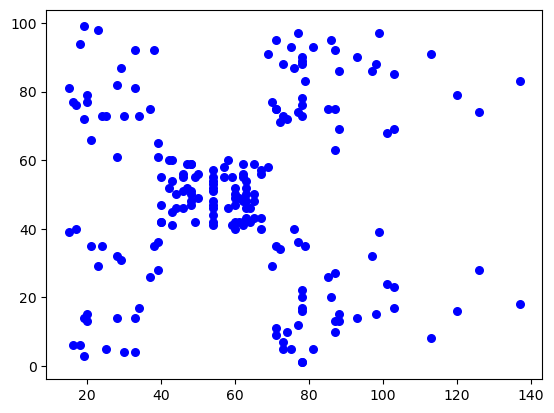

In [30]:
plt.scatter(X["x1"], X["x2"], s = 30, c = 'b')
plt.show()

In [31]:
Kmean = KMeans(n_clusters=5)
Kmean.fit(X)

centers=Kmean.cluster_centers_
print(Kmean.cluster_centers_)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]


In [33]:
clusters = Kmean.fit_predict(X)
data["label"] = clusters
data.head(100)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),x1,x2,label
0,1,Male,19,15,39,15,39,0
1,2,Male,21,15,81,15,81,4
2,3,Female,20,16,6,16,6,0
3,4,Female,23,16,77,16,77,4
4,5,Female,31,17,40,17,40,0
...,...,...,...,...,...,...,...,...
95,96,Male,24,60,52,60,52,3
96,97,Female,47,60,47,60,47,3
97,98,Female,27,60,50,60,50,3
98,99,Male,48,61,42,61,42,3


In [35]:
col = ['green','blue','black','yellow','orange']

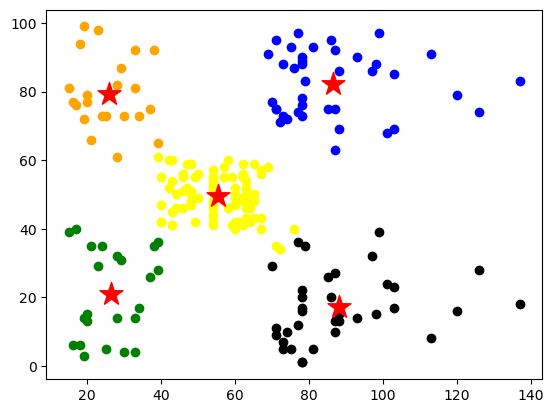

In [36]:
for i in range(5):
    a = col[i]
    #print(a)
    plt.scatter(data.x1[data.label==i], data.x2[data.label==i], c=a, label='cluster 1')
plt.scatter(centers[:, 0],centers[:, 1], marker ='*', s=300,
           c='r', label='centroid')

# Elbow Plot

In [37]:
X1 = X.loc[:, ["x1","x2"]].values

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

<function matplotlib.pyplot.show(close=None, block=None)>

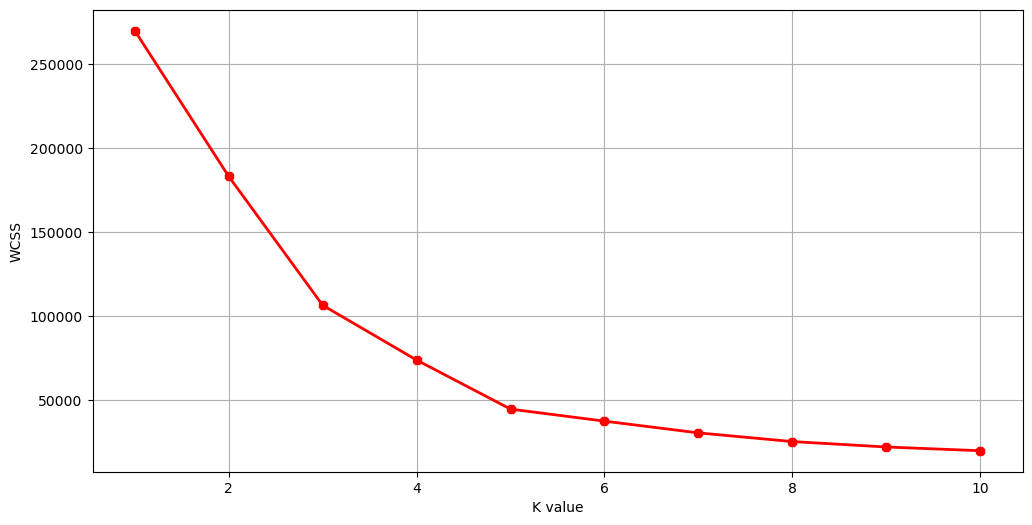

In [38]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show